# Introduction to neural network classification with Tensorflow

In this notebook, we're going to learn how to write neural networks for classification problems.

A classification is where we try to classify something as one thing or another.

A few types of classification problems:
* Binary Classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [3]:
# check the labels
y[:5]

array([1, 1, 1, 1, 0])

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

Our data is a little hard to understand right now, let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


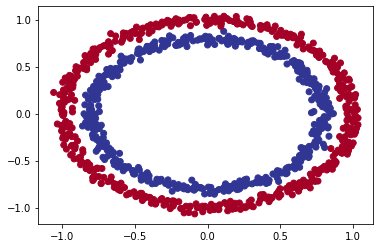

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.RdYlBu);

Tensorflow Playground: https://playground.tensorflow.org

## Input and Output shapes

In [7]:
# check the shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# how many samples we're working with?
len(X)

1000

In [9]:
# view the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [10]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(1)                       
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3.Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [12]:
# let's try and improve our model by training our model for longer...
model_1.fit(X, y, epochs=200, verbose=0)

In [13]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy, it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)                         
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving a model

1. Create a model - we might want to add more layers or increase the number of hidden units withing a layer.
2. Compiling a model - we might want to choose a different optimization function.
3. Fitting a model - we migth fit our model for more epochs( leave it training for longer).

In [17]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
# 4. evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [19]:
model_3.predict(X)[:5]

array([[0.48793244],
       [0.55887616],
       [0.56292856],
       [0.5705068 ],
       [0.44141158]], dtype=float32)

> **Inspect your data, inspect your model, inspect your model's predictions**

To visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained mode, features (X) and labels (y) 
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot predictions as well as a line between the different zones (where each unique class falls).

In [20]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class 
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, aplha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'aplha'


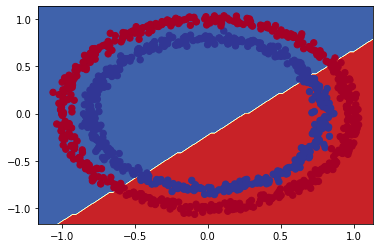

In [21]:
# check out the predictions our model is making
plot_decision_boundary(model_3, X, y);

So, from above visualization, we can  interpret that the model is not performing well as it's predicting a linear decision boundary for non-linear data.

Helpful Resource: 
* https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
* https://cs231n.github.io/neural-networks-case-study/

In [22]:
# let's see if our model can be used for regression problem

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# # fit our model
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

It didn't work! Because we compiled our model for a binary classification problem.


In [23]:
X_reg_train.shape, y_reg_train.shape

((150,), (150,))

In [24]:
X_reg_train.ndim, y_reg_train.ndim

(1, 1)

In [25]:
# # Setup random seed
# tf.random.set_seed(42)

# # Recreate the model
# model_3 = tf.keras.Sequential([
#   tf.keras.layers.Dense(100),
#   tf.keras.layers.Dense(10),
#   tf.keras.layers.Dense(1)
# ])

# # Change the loss and metrics of our compiled model
# model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['mae']) # change the metric to be regression-specific

# # Fit the recompiled model
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

## The missing piece: Non-linearity

In [26]:
X.shape, y.shape

((1000, 2), (1000,))

Creating a neural network with activation=`linear`...

In [27]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_4 = tf.keras.Sequential([
       tf.keras.layers.Dense(1, activation='linear')                        
])

# 2. compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

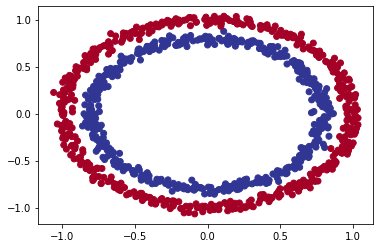

In [28]:
# check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'aplha'


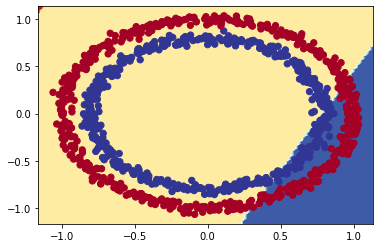

In [29]:
# check the decision boundary for our latest model
plot_decision_boundary(model_4, X,y);

Let's try build our first neural network with a non-linear activation function.

In [30]:
# set randon seed
tf.random.set_seed(42)

# 1. create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])

# 2. compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_5.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

Tried training in Tensor Playground with 2 hidden layers with 4 and 3 neurons in each respectively.

Let's recreate the model using tensorflow code..

In [31]:
# setup random seed
tf.random.set_seed(42)

# 1. create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(3, activation="relu"),
  tf.keras.layers.Dense(1)                              
])

# 2. compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3.fit the model
history = model_6.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
# evaluate the latest model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6442 - accuracy: 0.5950


[0.6441717147827148, 0.5950000286102295]

doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'aplha'


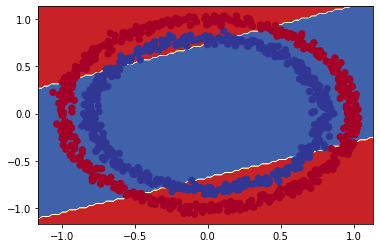

In [33]:
#how do our model's predictions look?
plot_decision_boundary(model_6, X, y)

Let's use `sigmoid` activation function for output layer.

In [34]:
# setup random seed
tf.random.set_seed(42)

# 1. create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                           
])

# 2. compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [35]:
# 4. evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'aplha'


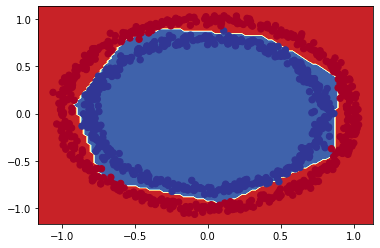

In [36]:
# let's visualize our model
plot_decision_boundary(model_7, X, y)

### Non-linear functions

* `sigmoid`
* `relu`

In [37]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

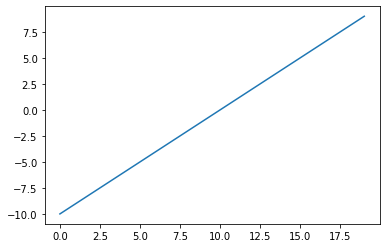

In [38]:
# visualize our toy tensor
plt.plot(A);

* **`sigmoid`** activation function:

In [39]:
# let's start by replicating sigmoid - sigmoid(x) = 1/(1+ exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

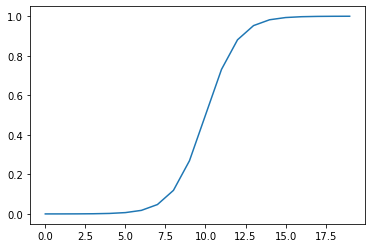

In [40]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

* **`relu`** activation function

In [41]:
# let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

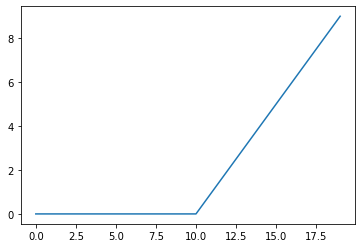

In [42]:
# plot relu-modified tensor
plt.plot(relu(A));

* **`linear`** activation function

In [43]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

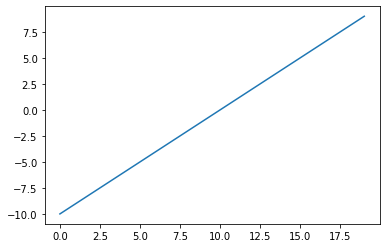

In [44]:
plt.plot(tf.keras.activations.linear(A));

In [45]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

It returns the input unmodified.

Thus, **non-linearity** is very important to find complex patterns in non-linear data. Simple linear activation functions alone are unable to find efficient decision boundaries leading to incorrect predictions.

Neural networks use combination of linear and non-linear activation functions to find complex patterns in data.

**Learning resource** - https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Evaluating and Improving classification model

In [46]:
# check how many examples we have
len(X), len(y)

(1000, 1000)

In [47]:
# split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [49]:
# let's recreate a model to fit on the training data and evaluate on the testing data

# set random seed
tf.random.set_seed(42)

# 1. create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")                           
])

# 2. compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [50]:
# 4, evaluate the model on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'aplha'


doing binary classification


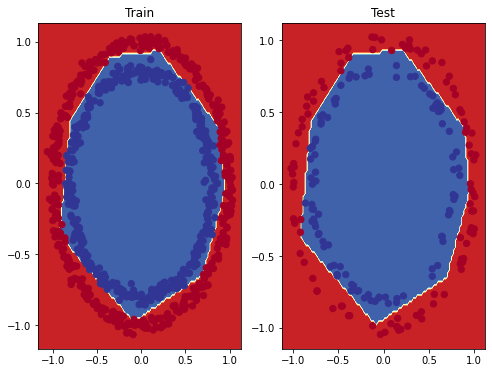

In [51]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [52]:
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632686853408813,
  0.6545672416687012,
  0.6412575244903564,
  0.6264281272888184,
  0.6038310527801514,
  0.5714036226272583,
  0.540442943572998,
  0.5015039443969727,
  0.46833187341690063,
  0.4113016128540039,
  0.3625059425830841,
  0.32090437412261963,
  0.2847079932689667,
  0.25971999764442444,
  0.23746901750564575,
  0.213519

In [53]:
# convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


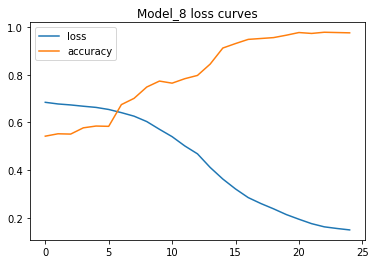

In [54]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

 ## Finding the best learning rate

 To find the ideal learning rate (the learning rate where the loss descreases the most during traing), we're going to use the following steps:  
 * A learning rate **callback** - you can think of an callback as an extra piece of functionality you can add to your model while it's training
 * Another model
 * A modified loss curves plot 


In [55]:
#  set random seed
tf.random.set_seed(42)

# 1. create a model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

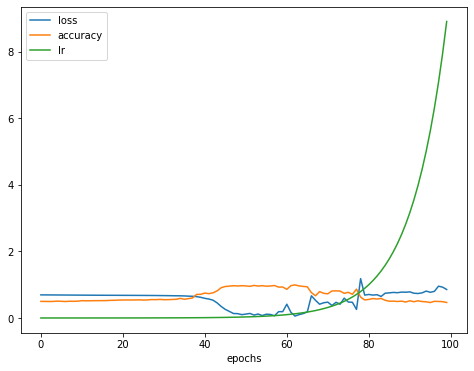

In [56]:
# checkout the history
pd.DataFrame(history_9.history).plot(figsize=(8,6), xlabel="epochs");

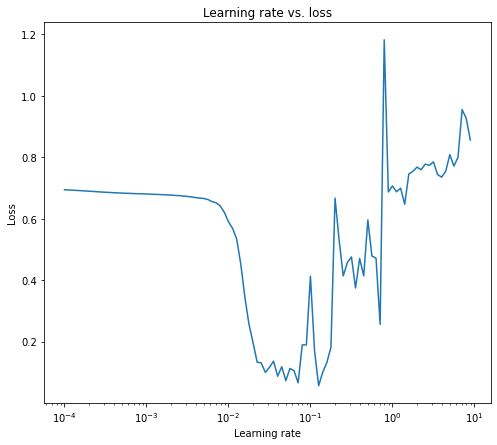

In [57]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10** (tf.range(100)/20))
plt.figure(figsize=(8,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [58]:
# let's try using a higher ideal learning rate with the same model

# set random seed
tf.random.set_seed(42)

# 1. create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# 3. fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

Increasing the `learning_rate` from `0.01` to 0.02` has achieved better results in lesser epochs (on training data)!

This may not always work but can be tried as hyperparameter tuning to improve model's predictions.

In [59]:
# evaluate model_10 on the test data
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [60]:
# evaluate model_8 on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

Achieving better results on training data does not guarantee that model will perform better on unseen data (as can be observed above). 

This process involves trial and error to figure out which model is idea for our usecase.

doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'aplha'


doing binary classification


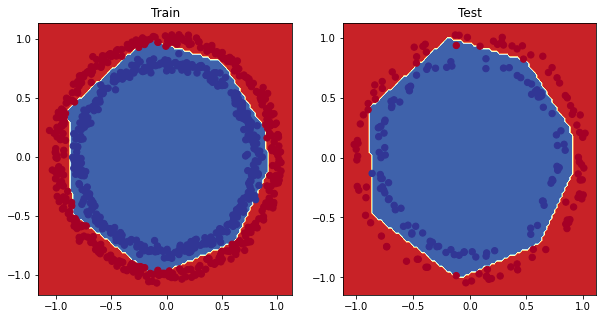

In [61]:
# plot the decision boundaries for the training and test set
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

## More classification evaluation methods

There are a handful of other classification evaluation methods & metrics we should be familiar with:  
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)


**Accuracy**

In [62]:
# check the accuracy of our model
loss, accuracy  = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on test set: 0.05740184709429741
Model accuracy on test set: 99.00%


**Confusion Matrix**

In [66]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make rpedictions
y_preds = model_10.predict(X_test)

# # create confusion matrix
# confusion_matrix(y_test, y_preds)

In [68]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [69]:
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

Looks like our predictions array has come out in **prediction probability** form...the standard output from the sigmoid (or softmax) activation functions.

(More the probability values are closer to 1, model is predicting 1. If it's closer to 0, model is predicting 0.)

In [70]:
# convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [71]:
# create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

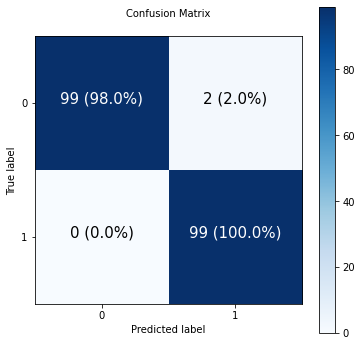

In [72]:
# prettify confusion matrix

import itertools

figsize=(6,6)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]

# let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust label size
ax.yaxis.label.set_size(10)
ax.xaxis.label.set_size(10)
ax.title.set_size(10)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)


## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

Dataset: https://www.tensorflow.org/datasets/catalog/fashion_mnist

Label	Description
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

In [73]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [74]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [75]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

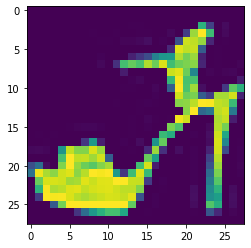

In [76]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[9])

In [77]:
train_labels[9]

5

In [78]:
# create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

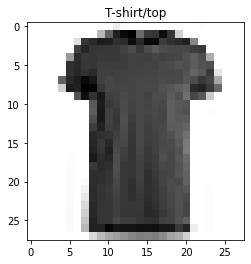

In [79]:
# plot an example image and it's image
index = 17
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

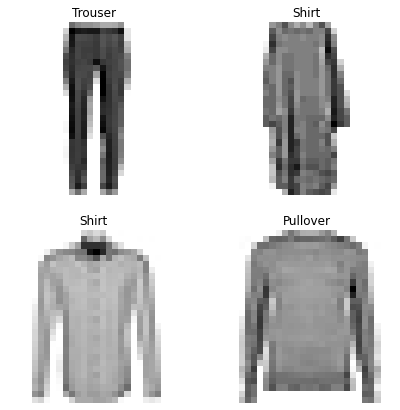

In [80]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to tweak a few things:    
* Input shape = 28 * 28 (shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = 
  * If your labels are one-hot encoded, use `tf.keras.losses.CategoricalCrossentropy()`
  * If your labels are in integer form, use `tf.keras.losses.SparseCategoricalCrossentropy()`
* Output layer activation = Softmax (not sigmoid)


In [81]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

Categorical crossentropy - https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy#used-in-the-notebooks


> Use `Categoricalcrossentropy` loss function when there are two or more label classes. We expect labels to be provided in a `one_hot` representation. If you want to provide labels as `integers`, please use `SparseCategoricalCrossentropy` loss.




In [82]:
# set random seed
tf.random.set_seed(42)

# create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [83]:
# check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [85]:
# check the min and max of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [86]:
# we can get our training data and testing data to be between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [87]:
 # now our data is normalized,let's build a model to find patterns in it

 # set random seed
 tf.random.set_seed(42)

 # create a model
 model_12 = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)),
   tf.keras.layers.Dense(4, activation="relu"),
   tf.keras.layers.Dense(4, activation="relu"),
   tf.keras.layers.Dense(10, activation="softmax")
 ])

 # compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

🔑 Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

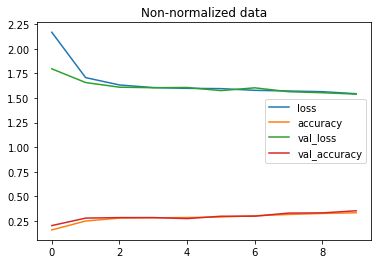

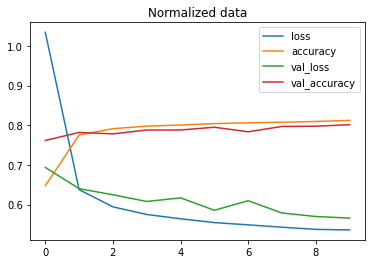

In [89]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

🔑 The same model with even slightly different data can produce dramatically different results.So when you're comparing models, it's important to make sure you're comparing them to the same criteria (e.g same architecture but different data or same data but different architecture.)

### Finding the ideal learning rate

In [90]:
# set random seed
tf.random.set_seed(42)

# create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

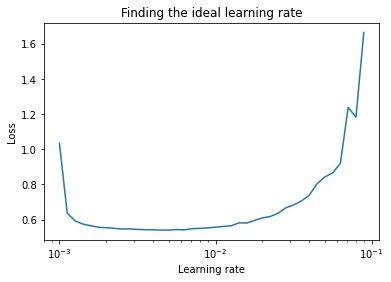

In [91]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs= 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [93]:
# let's refit a model with the ideal learning rate

# set the random seed
tf.random.set_seed(42)

# create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")              
])

# compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# fit the model
history_14 = model_14.fit(train_data_norm,
             train_labels,
             epochs=20,
             validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

### Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:    
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualiztions)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [94]:
# create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(6,6), text_size=15):

    # create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
    n_classes = cm.shape[0]

    # let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # set labels to be classes
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i,j] > threshold else "black",
              size=text_size)

In [95]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [96]:
# make some predictions with our model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5] 

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

If your model was trained on normalized data, you'll want to make predictions on normalized data.

Remember to make predictions on the same kind of data your model was trained on.

In [97]:
y_probs[0], tf.argmax(y_probs[0])

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [98]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [101]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:5]

array([9, 2, 1, 1, 6])

In [102]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

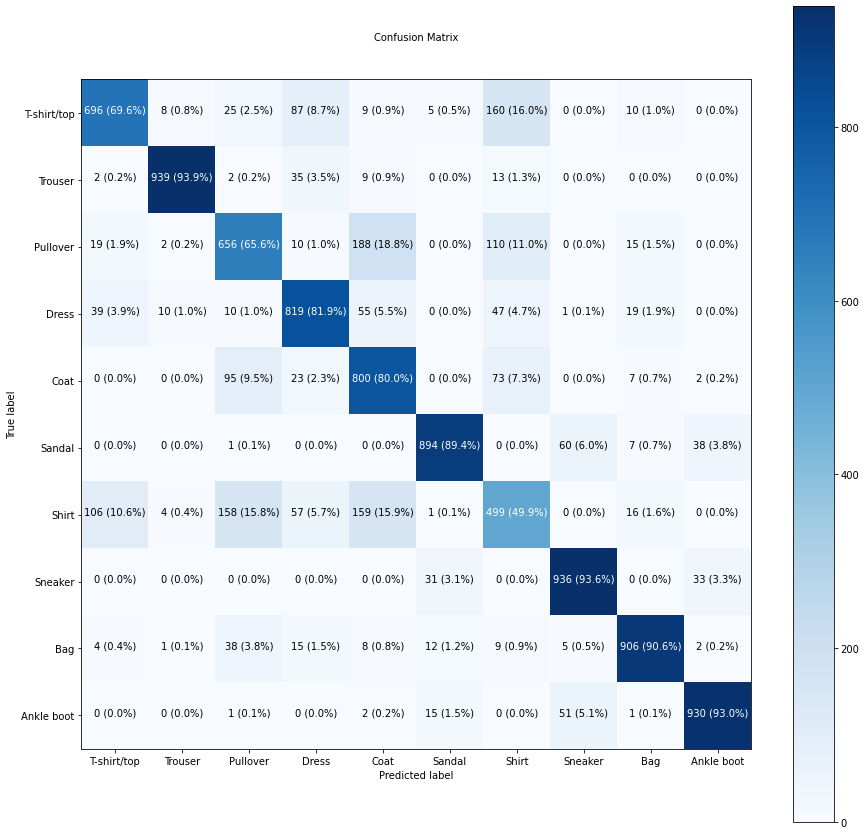

In [108]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [116]:
# make a function to plot a random image and label the plot with it's truth label and predicted label

import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # set up random integer
  i = random.randint(0, len(images))

  # create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))  # reshaping because there is only one image
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"

  # add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on prediction
             

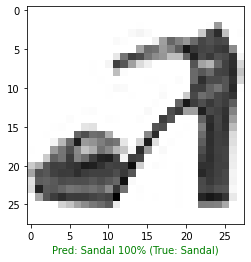

In [130]:
# check out a random image as well as it's prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

### What patterns is our model learning?

In [131]:
# find the layers of most recent model
model_14.layers

In [132]:
# extract a particular layer
model_14.layers[1]

In [133]:
# get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [135]:
weights[0,:]

array([ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ], dtype=float32)

In [134]:
# now let's check out bias vector..
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (atleast in case of a tensorflow dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer. 

In [136]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


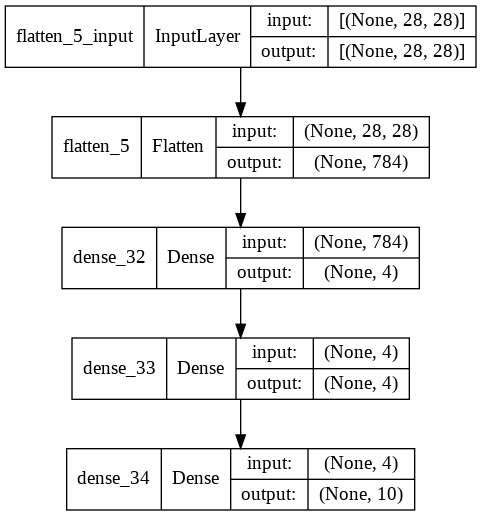

In [138]:
# let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# see the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)